#### balanced and unbalanced data? how to handle it?
- https://www.youtube.com/watch?v=OIjV_V8CpYs&ab_channel=KrishNaik

In [6]:
import os
os.chdir('C://Users//Swamy//Desktop//MARCH18//PYTHON//ML//Labdata')
os.getcwd()

'C:\\Users\\Swamy\\Desktop\\MARCH18\\PYTHON\\ML\\Labdata'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    284315
1       492
Name: Class, dtype: int64

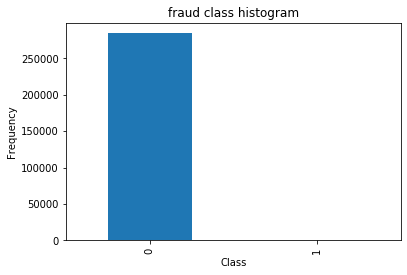

In [9]:
pd.value_counts(df['Class']).plot.bar()
plt.title('fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df['Class'].value_counts()

In [10]:
from sklearn.preprocessing import StandardScaler
#StandardScaler?

In [11]:
df['normAmount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1))

In [12]:
df=df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
X=np.array(df.iloc[:,df.columns!='Class'])
y=np.array(df.iloc[:,df.columns=='Class'])
#type(y)
#X.ndim

In [17]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [24]:
print(type(y))
print(y.ndim)
print(y)

<class 'numpy.ndarray'>
2
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


In [30]:
from imblearn.over_sampling import SMOTE
#SMOTE?

In [31]:
print('before oversampling count labels 1 is',sum(y_train==1))
print('before oversampling count labels 0 is ',sum(y_train==0))

before oversampling count labels 1 is [345]
before oversampling count labels 0 is  [199019]


In [32]:
sm=SMOTE(random_state=2)
X_train_res,y_train_res=sm.fit_sample(X_train,y_train)


In [33]:
print('After OVersampling the shape of train_X',X_train_res.shape)
print('After OVersampling the shape of train_y',y_train_res.shape)

After OVersampling the shape of train_X (398038, 29)
After OVersampling the shape of train_y (398038,)


In [34]:
print('After OVersampling count labels 1 is',sum(y_train_res==1))
print('After OVersampling count labels 0 is',sum(y_train_res==0))

After OVersampling count labels 1 is 199019
After OVersampling count labels 0 is 199019


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [36]:
parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   58.3s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.5min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [39]:
predictions = clf.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [40]:
clf.best_params_

{'C': 9.0}